In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [62]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [63]:
x_train.shape

(60000, 28, 28)

In [65]:
y_train.shape

(60000,)

In [66]:
x_test.shape

(10000, 28, 28)

<Figure size 576x288 with 0 Axes>

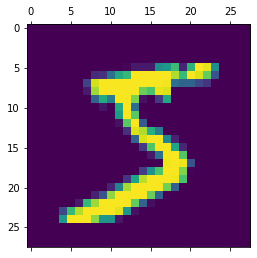

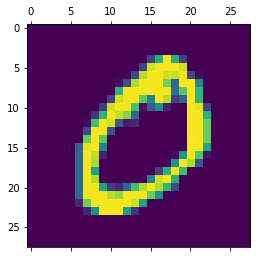

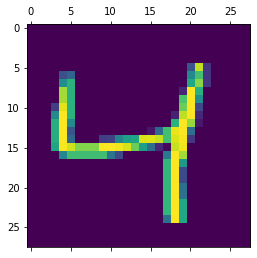

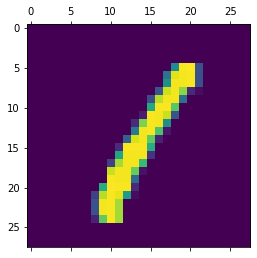

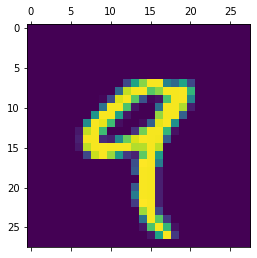

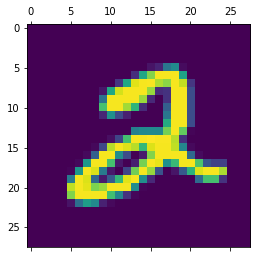

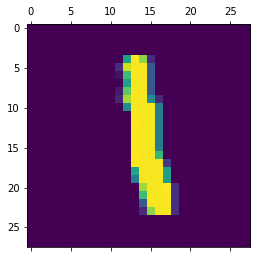

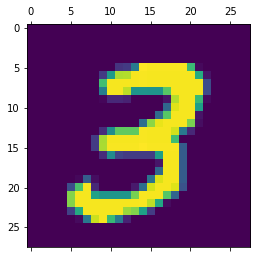

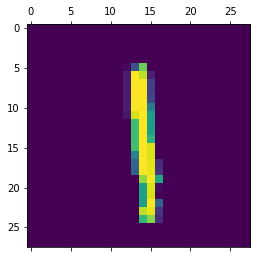

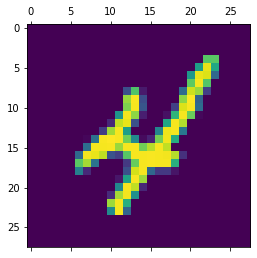

In [67]:
plt.figure(figsize=(8,4))
for i in range(0,10): 
    plt.matshow(x_train[i])
   

In [68]:
q=x_train.reshape(1,-1)

In [69]:
q.shape

(1, 47040000)

In [70]:
x_train.reshape(60000,28*28).shape

(60000, 784)

In [71]:
x_train=x_train/255
x_test=x_test/255

In [72]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.4698 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 869us/step - loss: 0.2832 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.2729 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.2664 - accuracy: 0.9257


In [73]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 651us/step - loss: 0.2657 - accuracy: 0.9273


[0.2657164931297302, 0.927299976348877]

In [74]:
predictions=model.predict(x_test)

In [75]:
predictions[1]

array([6.3380017e-04, 3.9153497e-06, 9.9227411e-01, 2.8124795e-04,
       2.9465457e-13, 3.2067231e-03, 3.4985268e-03, 7.2241889e-16,
       1.0177726e-04, 1.9945436e-12], dtype=float32)

In [14]:
np.argmax(predictions[0])

7

In [15]:
y_test[0]

7

In [16]:
predicted_labels=[np.argmax(i) for i in predictions]
predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


Text(69.0, 0.5, 'Truth')

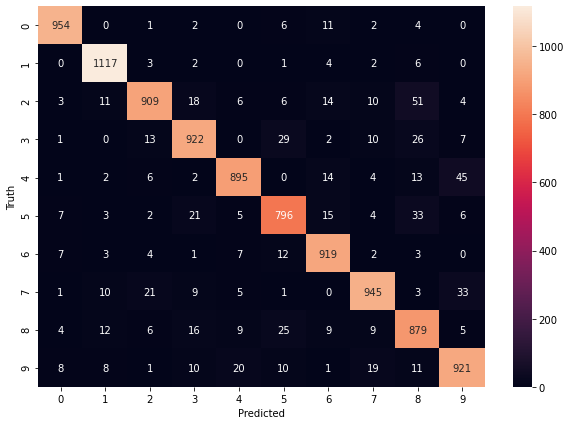

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.9179
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1386 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0974 - accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0751 - accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0612 - accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0410 - accuracy: 0.9880
Epoch 8/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.0341 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0300 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 2s 969us/step - loss:

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 918us/step - loss: 0.0806 - accuracy: 0.9770


[0.08056939393281937, 0.9769999980926514]

In [20]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='Nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2436 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1035 - accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0736 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0568 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0363 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0315 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.021

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.0918 - accuracy: 0.9781


[0.09179078042507172, 0.9781000018119812]

## Checking accuracy with CNN Model

In [76]:
x_train=x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [77]:
x_train.ndim

4

In [78]:
x_test=x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [79]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [31]:
cnn=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1587 - accuracy: 0.9528
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0532 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0346 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [34]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9832


[0.08291615545749664, 0.9832000136375427]

In [36]:
a=model.evaluate(x_test,y_test)
b=cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9832


In [39]:
b[1]-a[1]

0.0051000118255615234

In [82]:
cnn_pred=cnn.predict(x_test)

In [84]:
np.argmax(cnn_pred[0])

7

In [85]:
y_test[0]

7

In [102]:
for i in range(len(y_test)):
    print('True',' ', y_test[i],' ','Predicted',' ', np.argmax(cnn_pred[i]))
    if y_test[i] != np.argmax(cnn_pred[i]): print('NO')

True   7   Predicted   7
True   2   Predicted   2
True   1   Predicted   1
True   0   Predicted   0
True   4   Predicted   4
True   1   Predicted   1
True   4   Predicted   4
True   9   Predicted   9
True   5   Predicted   5
True   9   Predicted   9
True   0   Predicted   0
True   6   Predicted   6
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   5   Predicted   5
True   9   Predicted   9
True   7   Predicted   7
True   3   Predicted   5
NO
True   4   Predicted   4
True   9   Predicted   9
True   6   Predicted   6
True   6   Predicted   6
True   5   Predicted   5
True   4   Predicted   4
True   0   Predicted   0
True   7   Predicted   7
True   4   Predicted   4
True   0   Predicted   0
True   1   Predicted   1
True   3   Predicted   3
True   1   Predicted   1
True   3   Predicted   3
True   4   Predicted   4
True   7   Predicted   7
True   2   Predicted   2
True   7   Predicted   7
True   1   Predicted   1
True   2   Predicted   2
True   1   Predicted  

True   8   Predicted   8
True   3   Predicted   3
True   8   Predicted   8
True   2   Predicted   2
True   4   Predicted   4
True   5   Predicted   5
True   0   Predicted   0
True   3   Predicted   3
True   1   Predicted   1
True   7   Predicted   7
True   7   Predicted   7
True   5   Predicted   5
True   7   Predicted   7
True   9   Predicted   9
True   7   Predicted   7
True   1   Predicted   1
True   9   Predicted   9
True   2   Predicted   2
True   1   Predicted   1
True   4   Predicted   4
True   2   Predicted   2
True   9   Predicted   9
True   2   Predicted   2
True   0   Predicted   0
True   4   Predicted   4
True   9   Predicted   9
True   1   Predicted   1
True   4   Predicted   4
True   8   Predicted   8
True   1   Predicted   1
True   8   Predicted   8
True   4   Predicted   4
True   5   Predicted   5
True   9   Predicted   9
True   8   Predicted   8
True   8   Predicted   8
True   3   Predicted   3
True   7   Predicted   7
True   6   Predicted   6
True   0   Predicted   0


True   8   Predicted   8
True   8   Predicted   8
True   3   Predicted   3
True   3   Predicted   3
True   1   Predicted   1
True   7   Predicted   7
True   3   Predicted   3
True   5   Predicted   5
True   9   Predicted   9
True   6   Predicted   6
True   3   Predicted   3
True   2   Predicted   2
True   6   Predicted   6
True   1   Predicted   1
True   3   Predicted   3
True   6   Predicted   6
True   0   Predicted   0
True   7   Predicted   7
True   2   Predicted   2
True   1   Predicted   1
True   7   Predicted   7
True   1   Predicted   1
True   4   Predicted   4
True   2   Predicted   2
True   4   Predicted   4
True   2   Predicted   2
True   1   Predicted   1
True   7   Predicted   7
True   9   Predicted   9
True   6   Predicted   6
True   1   Predicted   1
True   1   Predicted   1
True   2   Predicted   2
True   4   Predicted   4
True   8   Predicted   3
NO
True   1   Predicted   1
True   7   Predicted   7
True   7   Predicted   7
True   4   Predicted   4
True   8   Predicted  

True   0   Predicted   0
True   9   Predicted   5
NO
True   8   Predicted   8
True   8   Predicted   8
True   6   Predicted   6
True   2   Predicted   2
True   5   Predicted   5
True   4   Predicted   4
True   1   Predicted   1
True   9   Predicted   9
True   2   Predicted   2
True   1   Predicted   1
True   5   Predicted   5
True   8   Predicted   8
True   7   Predicted   1
NO
True   0   Predicted   0
True   2   Predicted   2
True   4   Predicted   4
True   4   Predicted   4
True   3   Predicted   3
True   6   Predicted   6
True   8   Predicted   8
True   8   Predicted   8
True   2   Predicted   2
True   4   Predicted   4
True   0   Predicted   0
True   5   Predicted   5
True   0   Predicted   0
True   4   Predicted   4
True   4   Predicted   4
True   7   Predicted   7
True   9   Predicted   9
True   3   Predicted   3
True   4   Predicted   4
True   1   Predicted   1
True   5   Predicted   5
True   9   Predicted   9
True   7   Predicted   7
True   3   Predicted   3
True   5   Predicte

True   6   Predicted   6
True   5   Predicted   5
True   2   Predicted   2
True   4   Predicted   4
True   4   Predicted   4
True   3   Predicted   7
NO
True   2   Predicted   2
True   3   Predicted   3
True   5   Predicted   5
True   6   Predicted   6
True   8   Predicted   8
True   8   Predicted   8
True   6   Predicted   6
True   2   Predicted   2
True   3   Predicted   3
True   1   Predicted   1
True   0   Predicted   0
True   5   Predicted   5
True   8   Predicted   8
True   9   Predicted   9
True   2   Predicted   2
True   9   Predicted   9
True   6   Predicted   6
True   7   Predicted   7
True   0   Predicted   0
True   4   Predicted   4
True   8   Predicted   8
True   7   Predicted   7
True   1   Predicted   1
True   7   Predicted   7
True   4   Predicted   4
True   1   Predicted   1
True   0   Predicted   0
True   9   Predicted   5
NO
True   7   Predicted   7
True   2   Predicted   2
True   0   Predicted   0
True   0   Predicted   0
True   9   Predicted   9
True   1   Predicte

True   8   Predicted   8
True   5   Predicted   5
True   2   Predicted   2
True   8   Predicted   8
True   5   Predicted   5
True   7   Predicted   7
True   3   Predicted   3
True   0   Predicted   0
True   8   Predicted   8
True   2   Predicted   2
True   3   Predicted   7
NO
True   2   Predicted   2
True   8   Predicted   8
True   2   Predicted   2
True   5   Predicted   5
True   5   Predicted   5
True   7   Predicted   7
True   6   Predicted   6
True   4   Predicted   4
True   6   Predicted   0
NO
True   8   Predicted   8
True   4   Predicted   4
True   8   Predicted   8
True   2   Predicted   2
True   7   Predicted   7
True   4   Predicted   4
True   5   Predicted   5
True   2   Predicted   2
True   0   Predicted   0
True   3   Predicted   3
True   9   Predicted   8
NO
True   4   Predicted   9
NO
True   6   Predicted   6
True   7   Predicted   7
True   2   Predicted   2
True   5   Predicted   5
True   6   Predicted   8
NO
True   1   Predicted   1
True   1   Predicted   1
True   2  

True   3   Predicted   3
True   6   Predicted   6
True   0   Predicted   0
True   4   Predicted   4
True   9   Predicted   9
True   7   Predicted   7
True   5   Predicted   5
True   1   Predicted   1
True   6   Predicted   6
True   8   Predicted   8
True   9   Predicted   9
True   5   Predicted   5
True   5   Predicted   5
True   7   Predicted   7
True   9   Predicted   9
True   3   Predicted   3
True   8   Predicted   8
True   3   Predicted   3
True   8   Predicted   8
True   1   Predicted   1
True   5   Predicted   5
True   3   Predicted   3
True   5   Predicted   5
True   0   Predicted   0
True   5   Predicted   5
True   5   Predicted   5
True   3   Predicted   3
True   8   Predicted   8
True   6   Predicted   6
True   7   Predicted   7
True   7   Predicted   7
True   7   Predicted   7
True   3   Predicted   3
True   7   Predicted   7
True   0   Predicted   0
True   5   Predicted   5
True   9   Predicted   9
True   0   Predicted   0
True   2   Predicted   2
True   5   Predicted   5


True   3   Predicted   7
NO
True   1   Predicted   1
True   9   Predicted   9
True   5   Predicted   5
True   3   Predicted   3
True   0   Predicted   0
True   6   Predicted   6
True   9   Predicted   9
True   8   Predicted   8
True   4   Predicted   4
True   0   Predicted   0
True   4   Predicted   9
NO
True   9   Predicted   7
NO
True   2   Predicted   2
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   0   Predicted   0
True   3   Predicted   3
True   1   Predicted   1
True   6   Predicted   6
True   5   Predicted   5
True   8   Predicted   8
True   1   Predicted   1
True   5   Predicted   5
True   3   Predicted   3
True   3   Predicted   3
True   0   Predicted   0
True   3   Predicted   3
True   5   Predicted   5
True   5   Predicted   5
True   9   Predicted   9
True   2   Predicted   2
True   8   Predicted   8
True   7   Predicted   7
True   0   Predicted   0
True   4   Predicted   4
True   9   Predicted   9
True   1   Predicted   1
True   9   Predi

True   3   Predicted   3
True   4   Predicted   4
True   7   Predicted   7
True   2   Predicted   2
True   7   Predicted   7
True   5   Predicted   5
True   7   Predicted   7
True   0   Predicted   0
True   4   Predicted   4
True   3   Predicted   3
True   3   Predicted   3
True   2   Predicted   2
True   6   Predicted   6
True   7   Predicted   7
True   6   Predicted   6
True   0   Predicted   0
True   0   Predicted   0
True   6   Predicted   6
True   7   Predicted   7
True   7   Predicted   7
True   0   Predicted   0
True   5   Predicted   5
True   5   Predicted   5
True   8   Predicted   8
True   1   Predicted   1
True   0   Predicted   0
True   7   Predicted   7
True   0   Predicted   0
True   2   Predicted   2
True   8   Predicted   8
True   1   Predicted   1
True   5   Predicted   5
True   0   Predicted   0
True   8   Predicted   8
True   8   Predicted   8
True   0   Predicted   0
True   3   Predicted   3
True   2   Predicted   2
True   7   Predicted   7
True   7   Predicted   7


True   4   Predicted   4
True   0   Predicted   0
True   5   Predicted   5
True   1   Predicted   1
True   0   Predicted   0
True   2   Predicted   2
True   2   Predicted   2
True   6   Predicted   6
True   4   Predicted   4
True   4   Predicted   4
True   3   Predicted   3
True   9   Predicted   9
True   6   Predicted   5
NO
True   1   Predicted   1
True   6   Predicted   6
True   5   Predicted   5
True   7   Predicted   7
True   9   Predicted   9
True   2   Predicted   2
True   0   Predicted   0
True   2   Predicted   2
True   6   Predicted   6
True   0   Predicted   0
True   1   Predicted   1
True   4   Predicted   4
True   3   Predicted   3
True   5   Predicted   5
True   2   Predicted   2
True   8   Predicted   8
True   8   Predicted   8
True   0   Predicted   0
True   8   Predicted   8
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   9   Predicted   9
True   6   Predicted   6
True   7   Predicted   7
True   6   Predicted   6
True   3   Predicted  

True   1   Predicted   1
True   3   Predicted   3
True   7   Predicted   7
True   5   Predicted   5
True   3   Predicted   3
True   1   Predicted   1
True   9   Predicted   9
True   8   Predicted   8
True   2   Predicted   2
True   2   Predicted   2
True   2   Predicted   2
True   8   Predicted   8
True   8   Predicted   8
True   5   Predicted   5
True   7   Predicted   7
True   3   Predicted   3
True   8   Predicted   8
True   9   Predicted   9
True   8   Predicted   8
True   8   Predicted   8
True   6   Predicted   6
True   8   Predicted   8
True   2   Predicted   2
True   3   Predicted   3
True   9   Predicted   9
True   7   Predicted   7
True   5   Predicted   5
True   6   Predicted   6
True   2   Predicted   2
True   9   Predicted   9
True   2   Predicted   2
True   8   Predicted   8
True   8   Predicted   8
True   1   Predicted   1
True   6   Predicted   6
True   8   Predicted   8
True   8   Predicted   8
True   7   Predicted   7
True   9   Predicted   9
True   1   Predicted   1


True   8   Predicted   8
True   4   Predicted   4
True   5   Predicted   5
True   2   Predicted   2
True   7   Predicted   7
True   8   Predicted   8
True   1   Predicted   1
True   1   Predicted   1
True   3   Predicted   3
True   0   Predicted   0
True   3   Predicted   3
True   5   Predicted   5
True   7   Predicted   7
True   0   Predicted   0
True   3   Predicted   3
True   1   Predicted   1
True   9   Predicted   9
True   3   Predicted   3
True   6   Predicted   6
True   3   Predicted   3
True   1   Predicted   1
True   7   Predicted   7
True   7   Predicted   7
True   3   Predicted   3
True   0   Predicted   0
True   8   Predicted   8
True   4   Predicted   4
True   8   Predicted   8
True   2   Predicted   2
True   6   Predicted   6
True   5   Predicted   5
True   2   Predicted   2
True   9   Predicted   9
True   7   Predicted   7
True   3   Predicted   3
True   9   Predicted   9
True   0   Predicted   0
True   9   Predicted   9
True   9   Predicted   9
True   6   Predicted   6


True   1   Predicted   1
True   9   Predicted   9
True   9   Predicted   9
True   2   Predicted   2
True   7   Predicted   7
True   8   Predicted   8
True   0   Predicted   0
True   1   Predicted   1
True   3   Predicted   3
True   6   Predicted   6
True   1   Predicted   1
True   3   Predicted   3
True   4   Predicted   4
True   1   Predicted   1
True   1   Predicted   1
True   1   Predicted   1
True   5   Predicted   5
True   6   Predicted   6
True   0   Predicted   0
True   7   Predicted   7
True   0   Predicted   0
True   7   Predicted   7
True   2   Predicted   2
True   3   Predicted   3
True   2   Predicted   2
True   5   Predicted   5
True   2   Predicted   2
True   2   Predicted   2
True   9   Predicted   9
True   4   Predicted   4
True   9   Predicted   9
True   8   Predicted   8
True   1   Predicted   1
True   2   Predicted   2
True   1   Predicted   1
True   6   Predicted   6
True   1   Predicted   1
True   2   Predicted   2
True   7   Predicted   7
True   8   Predicted   8


True   3   Predicted   3
True   1   Predicted   1
True   6   Predicted   6
True   9   Predicted   9
True   7   Predicted   7
True   4   Predicted   4
True   3   Predicted   3
True   0   Predicted   0
True   2   Predicted   2
True   5   Predicted   5
True   2   Predicted   2
True   6   Predicted   6
True   0   Predicted   0
True   8   Predicted   8
True   9   Predicted   9
True   4   Predicted   4
True   3   Predicted   3
True   5   Predicted   5
True   4   Predicted   4
True   8   Predicted   8
True   1   Predicted   1
True   5   Predicted   5
True   9   Predicted   9
True   0   Predicted   0
True   6   Predicted   6
True   4   Predicted   4
True   3   Predicted   3
True   6   Predicted   6
True   3   Predicted   3
True   3   Predicted   3
True   8   Predicted   8
True   1   Predicted   1
True   4   Predicted   4
True   7   Predicted   7
True   5   Predicted   5
True   7   Predicted   7
True   2   Predicted   2
True   2   Predicted   2
True   0   Predicted   0
True   0   Predicted   0


True   8   Predicted   8
True   2   Predicted   2
True   7   Predicted   7
True   4   Predicted   4
True   8   Predicted   8
True   1   Predicted   1
True   8   Predicted   8
True   0   Predicted   0
True   5   Predicted   5
True   3   Predicted   3
True   9   Predicted   9
True   4   Predicted   4
True   1   Predicted   1
True   9   Predicted   9
True   2   Predicted   2
True   1   Predicted   1
True   9   Predicted   9
True   6   Predicted   6
True   7   Predicted   7
True   9   Predicted   9
True   0   Predicted   0
True   4   Predicted   4
True   6   Predicted   6
True   1   Predicted   1
True   7   Predicted   7
True   3   Predicted   3
True   8   Predicted   8
True   7   Predicted   7
True   2   Predicted   2
True   9   Predicted   9
True   6   Predicted   0
NO
True   5   Predicted   5
True   8   Predicted   8
True   3   Predicted   3
True   9   Predicted   9
True   0   Predicted   0
True   5   Predicted   5
True   7   Predicted   7
True   1   Predicted   1
True   6   Predicted  

True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   8   Predicted   8
True   3   Predicted   3
True   9   Predicted   9
True   5   Predicted   5
True   5   Predicted   5
True   2   Predicted   2
True   6   Predicted   6
True   8   Predicted   8
True   4   Predicted   4
True   9   Predicted   9
True   1   Predicted   1
True   7   Predicted   7
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   5   Predicted   5
True   9   Predicted   9
True   6   Predicted   6


True   3   Predicted   3
True   8   Predicted   2
NO
True   4   Predicted   4
True   9   Predicted   9
True   1   Predicted   1
True   8   Predicted   8
True   6   Predicted   6
True   8   Predicted   2
NO
True   9   Predicted   5
NO
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   5
NO
True   1   Predicted   1
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   9   Predicted   9
True   8   Predicted   8
True   9   Predicted   9
True   8   Predicted   8
True   4   Predicted   4
True   1   Predicted   1
True   7   Predicted   7
True   7   Pr

True   5   Predicted   5
True   0   Predicted   0
True   6   Predicted   6
True   6   Predicted   6
True   3   Predicted   3
True   7   Predicted   7
True   6   Predicted   6
True   9   Predicted   9
True   9   Predicted   9
True   4   Predicted   4
True   8   Predicted   8
True   4   Predicted   4
True   1   Predicted   1
True   0   Predicted   0
True   6   Predicted   6
True   6   Predicted   6
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3


True   4   Predicted   4
True   5   Predicted   5
True   5   Predicted   5
True   3   Predicted   3
True   7   Predicted   7
True   5   Predicted   5
True   3   Predicted   3
True   1   Predicted   1
True   8   Predicted   8
True   2   Predicted   2
True   2   Predicted   2
True   3   Predicted   3
True   0   Predicted   0
True   2   Predicted   2
True   9   Predicted   9
True   4   Predicted   4
True   9   Predicted   9
True   7   Predicted   7
True   0   Predicted   0
True   2   Predicted   2
True   7   Predicted   7
True   4   Predicted   4
True   9   Predicted   9
True   9   Predicted   9
True   2   Predicted   2
True   5   Predicted   5
True   9   Predicted   9
True   8   Predicted   8
True   3   Predicted   3
True   8   Predicted   8
True   6   Predicted   6
True   7   Predicted   7
True   0   Predicted   0
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6


True   1   Predicted   1
True   6   Predicted   6
True   0   Predicted   0
True   1   Predicted   1
True   1   Predicted   1
True   8   Predicted   8
True   7   Predicted   7
True   7   Predicted   7
True   6   Predicted   6
True   3   Predicted   3
True   6   Predicted   6
True   0   Predicted   0
True   7   Predicted   7
True   2   Predicted   2
True   4   Predicted   4
True   1   Predicted   1
True   7   Predicted   7
True   0   Predicted   0
True   6   Predicted   6
True   7   Predicted   7
True   1   Predicted   1
True   2   Predicted   2
True   5   Predicted   5
True   8   Predicted   8
True   1   Predicted   1
True   8   Predicted   8
True   2   Predicted   2
True   8   Predicted   8
True   7   Predicted   7
True   6   Predicted   6
True   8   Predicted   8
True   7   Predicted   7
True   1   Predicted   1
True   6   Predicted   6
True   2   Predicted   2
True   9   Predicted   9
True   3   Predicted   3
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2


True   0   Predicted   0
True   3   Predicted   3
True   4   Predicted   4
True   2   Predicted   2
True   6   Predicted   6
True   4   Predicted   4
True   7   Predicted   7
True   4   Predicted   4
True   2   Predicted   2
True   7   Predicted   7
True   4   Predicted   4
True   2   Predicted   2
True   9   Predicted   9
True   2   Predicted   2
True   7   Predicted   7
True   9   Predicted   9
True   2   Predicted   2
True   1   Predicted   1
True   0   Predicted   6
NO
True   6   Predicted   6
True   5   Predicted   5
True   3   Predicted   3
True   4   Predicted   4
True   8   Predicted   8
True   5   Predicted   5
True   9   Predicted   9
True   6   Predicted   6
True   9   Predicted   9
True   0   Predicted   0
True   6   Predicted   6
True   3   Predicted   3
True   0   Predicted   0
True   8   Predicted   8
True   1   Predicted   1
True   6   Predicted   6
True   0   Predicted   0
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted  

True   2   Predicted   2
True   1   Predicted   1
True   3   Predicted   3
True   9   Predicted   9
True   7   Predicted   7
True   2   Predicted   2
True   1   Predicted   1
True   2   Predicted   2
True   8   Predicted   8
True   9   Predicted   9
True   1   Predicted   1
True   8   Predicted   8
True   8   Predicted   8
True   7   Predicted   7
True   8   Predicted   8
True   1   Predicted   1
True   0   Predicted   0
True   0   Predicted   0
True   6   Predicted   6
True   7   Predicted   7
True   7   Predicted   7
True   8   Predicted   8
True   7   Predicted   7
True   5   Predicted   5
True   0   Predicted   0
True   6   Predicted   6
True   1   Predicted   1
True   5   Predicted   5
True   7   Predicted   7
True   4   Predicted   4
True   6   Predicted   6
True   1   Predicted   1
True   2   Predicted   2
True   5   Predicted   5
True   0   Predicted   0
True   7   Predicted   7
True   9   Predicted   9
True   9   Predicted   9
True   0   Predicted   0
True   3   Predicted   3


True   8   Predicted   8
True   0   Predicted   0
True   3   Predicted   3
True   5   Predicted   5
True   3   Predicted   3
True   6   Predicted   6
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   6   Predicted   6
True   4   Predicted   4
True   2   Predicted   2
True   6   Predicted   6
True   4   Predicted   4
True   7   Predicted   7


True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   6
True   7   Predicted   7
True   8   Predicted   8
True   9   Predicted   9
True   0   Predicted   0
True   1   Predicted   1
True   2   Predicted   2
True   3   Predicted   3
True   4   Predicted   4
True   5   Predicted   5
True   6   Predicted   5
NO
True   7   Predicted   7
True   8   Predicted   8
True   8   Predicted   8
True   0   Predicted   0
True   6   Predicted   6
True   0   Predicted   0
True   0   Predicted   1
NO
True   2   Predicted   2
True   3   Predicted   3
True   7   Predicted   7
True   9   Predicted   9
True   4   Predicted   4
True   7   Predicted   7
True   1   Predicte